# Model Exploration

Use feature engineer dataset to predict `price` of US houses

| Date | User | Change Type | Remarks |  
| ---- | ---- | ----------- | ------- |
| 06/11/2025   | Martin | Create  | Notebook created to explore models | 
| 07/11/2025   | Martin | Create  | Trained final xgboost regressor model | 

# Content

* [Load Data](#load-data)
* [Baseline](#baseline)

In [5]:
%load_ext watermark

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import numpy as np
from xgboost import XGBRegressor, plot_importance

# Load Data

In [34]:
train_df = pd.read_csv("../data/clean/feat_eng_train.csv")
valid_df = pd.read_csv("../data/clean/feat_eng_valid.csv")
test_df = pd.read_csv("../data/clean/feat_eng_test.csv")

In [35]:
TARGET = "price"
X_train = train_df.drop(columns=[TARGET])
y_train = train_df[TARGET]

X_valid = valid_df.drop(columns=[TARGET])
y_valid = valid_df[TARGET]

X_test = test_df.drop(columns=[TARGET])
y_test = test_df[TARGET]

---

# Baseline

Use a dummy regressor using the __median__ value

In [9]:
baseline = DummyRegressor(strategy="median")
baseline.fit(X_train, y_train)

2025/11/07 12:35:45 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4eb68850b1e846419e72c74f3f4acffe', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/11/07 12:35:55 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Software\venv\py311_env\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <ht

DummyRegressor(strategy='median')

In [10]:
y_pred = baseline.predict(X_valid)

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)

print("Baseline Dummy Regressor (median)")
print(f"MAE:  {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²:   {r2:.4f}")

2025/11/07 12:36:02 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Software\venv\py311_env\Lib\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


Baseline Dummy Regressor (median)
MAE:  233,399.14
RMSE: 405,142.67
R²:   -0.2685


---

# Linear Regression w/ Regularisation

Linear regression model with various regularisation methods

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled  = scaler.transform(X_valid)

In [12]:
# Standard Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_valid_scaled)

print("Linear Regression:")
print(" MAE:", mean_absolute_error(y_valid, y_pred_lr))
print(" RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred_lr)))
print(" R²:", r2_score(y_valid, y_pred_lr))

2025/11/07 12:36:02 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'fbc36916e4b64524903511392c9f0780', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/11/07 12:36:02 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Linear Regression:
 MAE: 53718.43524693022
 RMSE: 121374.23465182667
 R²: 0.886155241548052


In [13]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_valid_scaled)

print("\nRidge Regression:")
print(" MAE:", mean_absolute_error(y_valid, y_pred_ridge))
print(" RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred_ridge)))
print(" R²:", r2_score(y_valid, y_pred_ridge))

2025/11/07 12:36:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '1c9e58660a8c41b2afe109496bde85fe', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/11/07 12:36:05 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'



Ridge Regression:
 MAE: 53717.711042072784
 RMSE: 121376.17231065291
 R²: 0.8861516066075316


In [14]:
# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_valid_scaled)

print("\nLasso Regression:")
print(" MAE:", mean_absolute_error(y_valid, y_pred_lasso))
print(" RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred_lasso)))
print(" R²:", r2_score(y_valid, y_pred_lasso))

2025/11/07 12:36:08 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '823f30d29a274b188690fc323b732f55', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/11/07 12:36:08 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'
d:\Software\venv\py311_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.146e+15, tolerance: 5.228e+12
  model = cd_fast.enet_coordinate_descent(



Lasso Regression:
 MAE: 54025.716663081155
 RMSE: 121642.04355458493
 R²: 0.8856522966503148


In [15]:
elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)
y_pred_elastic = elastic.predict(X_valid_scaled)

print("\nElasticNet Regression:")
print(" MAE:", mean_absolute_error(y_valid, y_pred_elastic))
print(" RMSE:", np.sqrt(mean_squared_error(y_valid, y_pred_elastic)))
print(" R²:", r2_score(y_valid, y_pred_elastic))

2025/11/07 12:36:30 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '931af2d324ce44efbeaa142db7e90652', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2025/11/07 12:36:30 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'



ElasticNet Regression:
 MAE: 54188.920955387875
 RMSE: 122341.54530337664
 R²: 0.8843334039911884


---

# XGBoost

In [16]:
xgb_model = XGBRegressor(
  n_estimators=500,
  learning_rate=0.05,
  max_depth=6,
  subsample=0.8,
  colsample_bytree=0.8,
  random_state=42,
  n_jobs=-1
)

xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [17]:
y_pred = xgb_model.predict(X_valid)

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
r2 = r2_score(y_valid, y_pred)

print("XGBoost Performance:")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R²: {r2:.4f}")

XGBoost Performance:
MAE: 32,259.69
RMSE: 70,715.79
R²: 0.9614


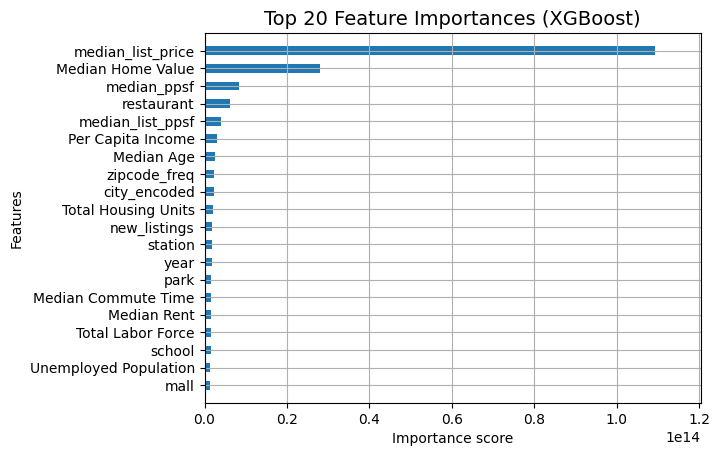

In [18]:
plot_importance(
  xgb_model,
  importance_type="gain",
  max_num_features=20,
  height=0.5,
  show_values=False
)
plt.title("Top 20 Feature Importances (XGBoost)", fontsize=14)
plt.show()

---

# MLFlow for Hyperparameter Tuning

In [19]:
import mlflow
import mlflow.xgboost
import optuna
from pathlib import Path

How to create a new experiment

In [20]:
artifact_path = Path("../models/mlruns").resolve().as_uri()

In [21]:
mlflow.set_tracking_uri("sqlite:///../models/mlflow.db")
# mlflow.create_experiment("my-first-experiment", artifact_location=artifact_path)
# mlflow.set_experiment("my-first-experiment")

In [ ]:
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Load the Iris dataset
# X, y = datasets.load_iris(return_X_y=True)

# # Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# # Define the model hyperparameters
# params = {
#     "solver": "lbfgs",
#     "max_iter": 1000,
#     "multi_class": "auto",
#     "random_state": 8888,
# }

# # Enable autologging for scikit-learn
# mlflow.sklearn.autolog()

# # Just train the model normally
# lr = LogisticRegression(**params)
# lr.fit(X_train, y_train)

2025/11/07 12:34:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '32cbb6ef197c4a458ef8b6a7f0e10944', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


LogisticRegression(max_iter=1000, random_state=8888)

Back to modeling for project:

Optuna for hyperparameter tuning

In [27]:
def objective(trial):
  params = {
    "n_estimators": trial.suggest_int("n_estimators", 200, 1000),
    "max_depth": trial.suggest_int("max_depth", 3, 10),
    "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
    "subsample": trial.suggest_float("subsample", 0.5, 1.0),
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
    "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
    "gamma": trial.suggest_float("gamma", 0.0, 5.0),
    "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
    "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
    "random_state": 42,
    "n_jobs": -1,
    "tree_method": "hist",
  }

  with mlflow.start_run(nested=True):
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_valid)
    rmse = float(np.sqrt(mean_squared_error(y_valid, y_pred)))
    mae = float(mean_absolute_error(y_valid, y_pred))
    r2 = float(r2_score(y_valid, y_pred))

    # Log hyperparameters + metrics
    mlflow.log_params(params)
    mlflow.log_metrics({"rmse": rmse, "mae": mae, "r2": r2})
  
  return rmse

In [28]:
# mlflow.create_experiment("xgboost_optuna_housing", artifact_location=artifact_path)
mlflow.set_experiment("xgboost_optuna_housing")

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=15)

print("Best Params:", study.best_trial.params)

[I 2025-11-07 13:48:57,012] A new study created in memory with name: no-name-044ab74b-79be-4eb5-92f4-38e1176c69db
[I 2025-11-07 13:49:10,218] Trial 0 finished with value: 68562.37222108994 and parameters: {'n_estimators': 882, 'max_depth': 8, 'learning_rate': 0.015273192062688215, 'subsample': 0.6203454262425655, 'colsample_bytree': 0.833256823996434, 'min_child_weight': 3, 'gamma': 3.5886690484091948, 'reg_alpha': 4.197079307415571, 'reg_lambda': 0.00404346618857167}. Best is trial 0 with value: 68562.37222108994.
[I 2025-11-07 13:49:27,013] Trial 1 finished with value: 76578.02781457065 and parameters: {'n_estimators': 999, 'max_depth': 9, 'learning_rate': 0.22103900970031587, 'subsample': 0.5452226724365998, 'colsample_bytree': 0.8333988042359524, 'min_child_weight': 7, 'gamma': 4.899962174148859, 'reg_alpha': 1.3472686277286578e-06, 'reg_lambda': 0.00035321336585055586}. Best is trial 0 with value: 68562.37222108994.
[I 2025-11-07 13:49:39,311] Trial 2 finished with value: 75085.96

Best Params: {'n_estimators': 589, 'max_depth': 7, 'learning_rate': 0.09989086606234156, 'subsample': 0.560297594843149, 'colsample_bytree': 0.6590645941836271, 'min_child_weight': 8, 'gamma': 1.928547797057426, 'reg_alpha': 1.4565881394834244e-08, 'reg_lambda': 1.0882504313953534e-07}


using the trained model on the test set

In [38]:
best_params = study.best_trial.params
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Results on test data")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

with mlflow.start_run(run_name="best_xgboost_test"):
  mlflow.log_params(best_params)
  mlflow.log_metrics({"rmse": rmse, "mae": mae, "r2": r2})

Results on test data
MAE: 55546.4699048889
RMSE: 118952.96182958379
R²: 0.9223319902222178


Finally train the entire model with both train and evaluation data (withold test data for the time being)

In [39]:
X_comb = pd.concat([X_train, X_valid], axis=0)
y_comb = pd.concat([y_train, y_valid], axis=0)

best_model = XGBRegressor(**best_params)
best_model.fit(X_comb, y_comb)

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Results on test data")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)

with mlflow.start_run(run_name="best_xgboost"):
  mlflow.log_params(best_params)
  mlflow.log_metrics({"rmse": rmse, "mae": mae, "r2": r2})
  mlflow.xgboost.log_model(best_model, name="model")

Results on test data
MAE: 44626.763029424415
RMSE: 91184.14056604987
R²: 0.9543616142631635


d:\Software\venv\py311_env\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [14:30:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)
2025/11/07 14:30:56 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [2]:
%watermark

Last updated: 2025-06-18T19:03:45.452311+08:00

Python implementation: CPython
Python version       : 3.11.9
IPython version      : 8.31.0

Compiler    : MSC v.1938 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 183 Stepping 1, GenuineIntel
CPU cores   : 20
Architecture: 64bit

